In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import torch
from IPython.display import HTML, display
import datetime as dt

from utils.diagnostics import compute_summary_statistics
from utils.dataset_utils import aggregate_results

plt.style.use('bmh')
plt.rcParams['lines.linewidth'] = 1

In [6]:
model_names = ["ew_lo_sample"]
stats_order = ["E[R]", "Std(R)", "Sharpe", "Sortino", "AvgDD", "MaxDD", "% Positive Ret."]

In [7]:
all_summary = []

for model in model_names:

        output_path = os.path.join(os.getcwd(),
                                   "data",
                                   "outputs",
                                   model)
    
        summary = aggregate_results(path=output_path)

        # compute pnl
        summary["pnl"] = summary["returns"] * summary["weights"]

        # add model name
        summary["model"] = model

        # save summary
        all_summary.append(summary)
all_summary_df = pd.concat(all_summary, axis=0)

## 1) Summary Statistics of the Portfolios

In [8]:
all_stats = {}
for model in model_names:

    portfolio_returns = torch.tensor(all_summary_df.loc[all_summary_df["model"] == model].groupby("date").sum()["pnl"])
    stats = compute_summary_statistics(portfolio_returns=portfolio_returns)

    all_stats[model] = stats
all_stats_df = pd.DataFrame(all_stats).T[stats_order]

display(HTML(all_stats_df.to_html()))

,E[R],Std(R),Sharpe,Sortino,AvgDD,MaxDD,% Positive Ret.
ew_lo_sample,13.431123,17.812244,0.754039,0.881625,-3.171223,-39.177116,0.52892


## 2) Cummulative Returns of the Portfolios

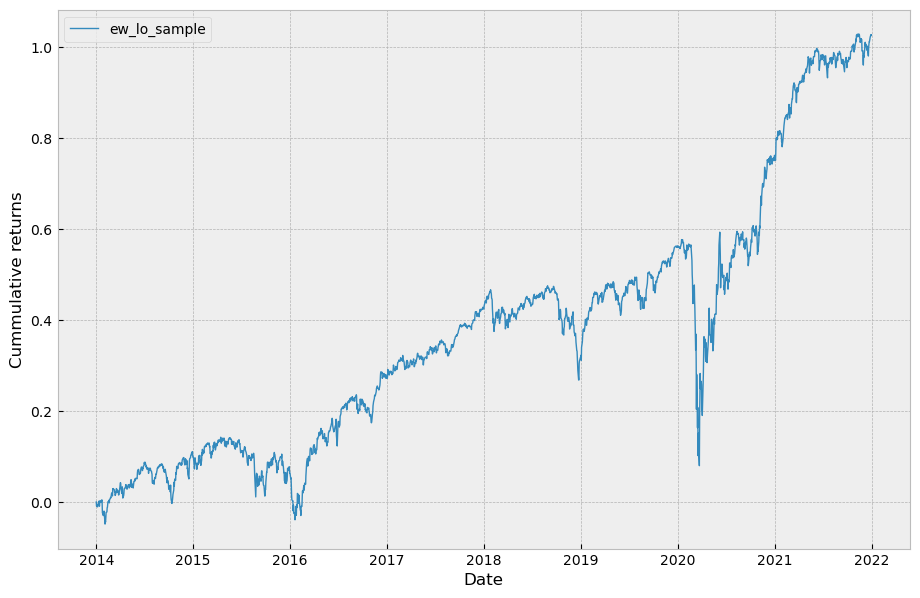

In [9]:

fig, ax = plt.subplots(figsize=(11, 7))
for model in model_names:
    summary_df = all_summary_df.loc[all_summary_df["model"] == model]
    cum_pnl_df = summary_df.groupby("date").sum()[["pnl"]].loc["2014-01-01":].cumsum().reset_index()
    ax.plot(pd.to_datetime(cum_pnl_df['date']), cum_pnl_df["pnl"], label=model)

plt.xlabel("Date")
plt.ylabel("Cummulative returns")
plt.legend(loc='best', fontsize=10)   
# fig.savefig('img/' + ticker + '_' + key1 + '_fs_methods.png')
plt.show()

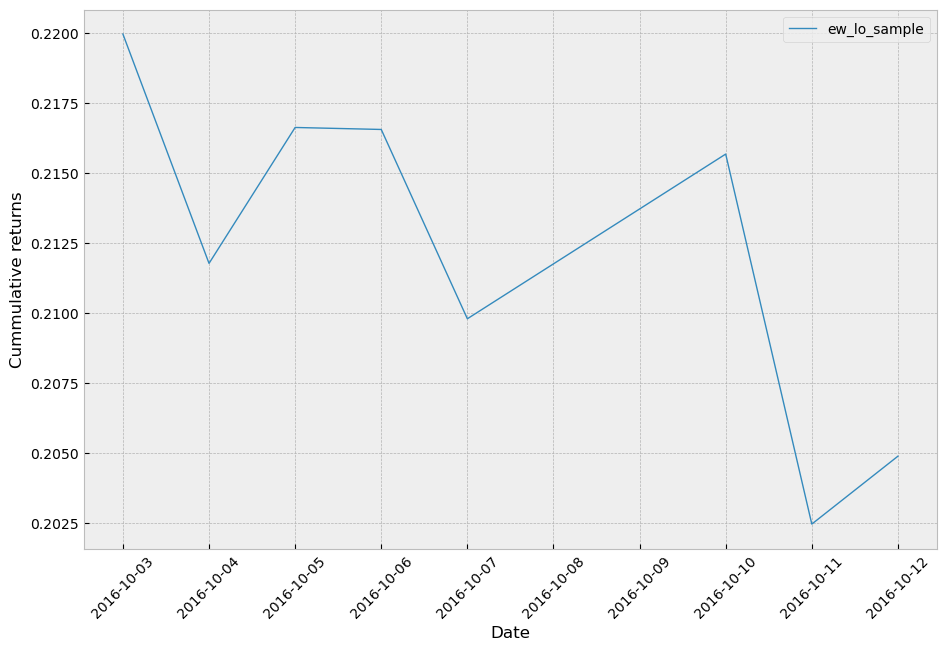

In [10]:
start_date = "2016-10-01"
end_date = "2016-10-13"

zoom_cum_pnl_df = cum_pnl_df.loc[(cum_pnl_df["date"] > start_date) & (cum_pnl_df["date"] < end_date)]

fig, ax = plt.subplots(figsize=(11, 7))
ax.plot(pd.to_datetime(zoom_cum_pnl_df['date']), zoom_cum_pnl_df["pnl"], label=model)
plt.xlabel("Date")
plt.ylabel("Cummulative returns")
plt.legend(loc='best', fontsize=10)   
plt.xticks(rotation=45)
plt.show()


In [11]:
zoom_cum_pnl_df

,date,pnl
718,2016-10-03,0.219971
719,2016-10-04,0.211784
720,2016-10-05,0.216637
721,2016-10-06,0.216565
722,2016-10-07,0.209807
723,2016-10-10,0.215687
724,2016-10-11,0.202476
725,2016-10-12,0.204900


## 3) Check weights

In [12]:
all_summary_df.tail()

,date,ticker,returns,weights,pnl,model
1994645,2021-12-31,CSL,0.009767,0.001439,0.000014,ew_lo_sample
1994646,2021-12-31,DHF,-0.030111,0.001439,-0.000043,ew_lo_sample
1994647,2021-12-31,NSC,0.010111,0.001439,0.000015,ew_lo_sample
1994648,2021-12-31,DSM,0.000000,0.001439,0.000000,ew_lo_sample
1994649,2021-12-31,MMC,0.001902,0.001439,0.000003,ew_lo_sample


In [14]:
check_name = "ew_lo_sample"
target_date = "2016-10-07"

all_summary_df.loc[(all_summary_df["model"] == check_name)&
                   (all_summary_df["date"] == target_date), ["returns", "weights", "pnl"]].describe()

,returns,weights,pnl
count,695.000000,6.950000e+02,6.950000e+02
mean,-0.006759,1.438849e-03,-9.724619e-06
std,0.014191,9.764847e-18,2.041911e-05
min,-0.089137,1.438849e-03,-1.282547e-04
25%,-0.012280,1.438849e-03,-1.766835e-05
50%,-0.005270,1.438849e-03,-7.582734e-06
75%,-0.000338,1.438849e-03,-4.856115e-07
max,0.152327,1.438849e-03,2.191755e-04


In [15]:
all_summary_df.loc[(all_summary_df["model"] == check_name)&(all_summary_df["date"] == target_date)].sort_values("returns", ascending=False)

,date,ticker,returns,weights,pnl,model
1045971,2016-10-07,GPS,0.152327,0.001439,0.000219,ew_lo_sample
1045831,2016-10-07,BPT,0.049239,0.001439,0.000071,ew_lo_sample
1045307,2016-10-07,INCY,0.032180,0.001439,0.000046,ew_lo_sample
1045288,2016-10-07,RE,0.030232,0.001439,0.000043,ew_lo_sample
1045509,2016-10-07,IGT,0.028560,0.001439,0.000041,ew_lo_sample
...,...,...,...,...,...,...
1045933,2016-10-07,PKE,-0.058971,0.001439,-0.000085,ew_lo_sample
1045431,2016-10-07,HON,-0.074993,0.001439,-0.000108,ew_lo_sample
1045458,2016-10-07,PPG,-0.082787,0.001439,-0.000119,ew_lo_sample
1045720,2016-10-07,LEE,-0.085873,0.001439,-0.000124,ew_lo_sample


In [16]:
all_summary_df.loc[all_summary_df["model"] == check_name, ["returns", "weights", "pnl"]].describe()

,returns,weights,pnl
count,1.994650e+06,1.994650e+06,1.994650e+06
mean,5.329811e-04,1.438849e-03,7.668792e-07
std,2.076980e-02,1.853683e-14,2.988461e-05
min,-6.807690e-01,1.438849e-03,-9.795237e-04
25%,-7.008000e-03,1.438849e-03,-1.008345e-05
50%,0.000000e+00,1.438849e-03,0.000000e+00
75%,8.172000e-03,1.438849e-03,1.175827e-05
max,1.244898e+00,1.438849e-03,1.791220e-03


In [17]:
all_summary_df.loc[all_summary_df["returns"] >= 1.11]

,date,ticker,returns,weights,pnl,model
1670213,2020-03-19,GES,1.244898,0.001439,0.001791,ew_lo_sample
1708485,2020-06-04,LUB,1.210663,0.001439,0.001742,ew_lo_sample
1755832,2020-09-08,LUB,1.114286,0.001439,0.001603,ew_lo_sample


<Axes: title={'center': 'AA returns'}, xlabel='date'>

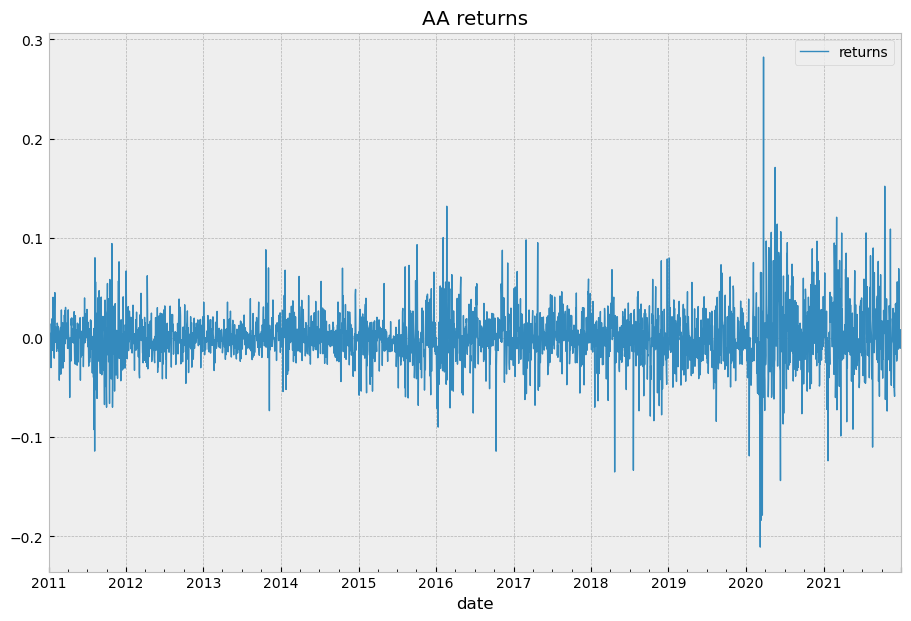

In [18]:
stock_name = "AA"

check_stock_df = all_summary_df.loc[(all_summary_df["model"] == check_name)&(all_summary_df["ticker"] == stock_name)][["date", "returns"]]
check_stock_df["date"] = pd.to_datetime(check_stock_df["date"])
check_stock_df.set_index("date", inplace=True)

check_stock_df.plot(figsize=(11, 7), title="{} returns".format(stock_name))

## 4) Check Returns from Raw Data

In [19]:
d1 = "2016-10-05"
d2 = "2016-10-06"

f1 = os.path.join(os.getcwd(), os.getcwd(), "data", "inputs", "US_CRSP_NYSE", "2016", "{}.csv.gz".format(d1).replace("-", ""))
f2 = os.path.join(os.getcwd(), os.getcwd(), "data", "inputs", "US_CRSP_NYSE", "2016", "{}.csv.gz".format(d2).replace("-", ""))
stock_name = "AA"

tmp_df1 = pd.read_csv(f1, compression='gzip', on_bad_lines='skip')
tmp_df2 = pd.read_csv(f2, compression='gzip', on_bad_lines='skip')

In [20]:
tmp_df1.loc[tmp_df1["ticker"] == stock_name]

,Unnamed: 0,ticker,open,high,low,close,volume,OPCL,pvCLCL,prevAdjClose,SPpvCLCL,sharesOut,PERMNO,SICCD,PERMCO,prevRawOpen,prevRawClose,prevAdjOpen
15,16,AA,10.25,10.41,10.17,10.4,29736798,0.014528,0.019608,10.2,0.004297,1315380,24643,3334,20060,10.06,10.2,10.06


In [21]:
tmp_df2.loc[tmp_df2["ticker"] == stock_name]

,Unnamed: 0,ticker,open,high,low,close,volume,OPCL,pvCLCL,prevAdjClose,SPpvCLCL,sharesOut,PERMNO,SICCD,PERMCO,prevRawOpen,prevRawClose,prevAdjOpen
15,16,AA,31.07,32.02,31.07,31.78,10026484,0.022594,0.01859,31.2,0.000482,438460,24643,3334,20060,10.25,10.4,30.75
